# Bank Customer Turnover Prediction with ANN

In [413]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# TensorFlow
import tensorflow as tf
from tensorflow import keras

# Sklearn
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score

# Matplotlib settings
%matplotlib inline
warnings.filterwarnings("ignore") # ignore warnings
plt.rc('font', size=16) 

print(f"NP version: {np.__version__}")
print(f"PD version: {pd.__version__}")
print(f"TF version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

NP version: 1.21.6
PD version: 1.3.5
TF version: 2.11.0
Keras version: 2.11.0


In [309]:
# Data
df = pd.read_csv("bank-turnover.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [310]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [311]:
df.shape

(10000, 14)

In [312]:
# Drop columns
df.drop(labels=["RowNumber", "CustomerId", "Surname"], 
        axis=1,
        inplace=True)

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [313]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [314]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [315]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

## Data Visualization

In [316]:
df[df.Exited == 1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [317]:
# Tenure and Customer turnover
def plot_exited_data(yes_df, 
                     no_df, 
                     xlabel=None, 
                     ylabel=None, 
                     title=None,
                     labels=["Yes", "No"],
                     colors=["red", "green"],
                     legend_loc="best"):
  
  plt.figure(figsize=(10, 7))

  plt.hist(x=[yes_df, no_df],
           color=colors,
           label=labels)
  
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)

  plt.legend(loc=legend_loc);

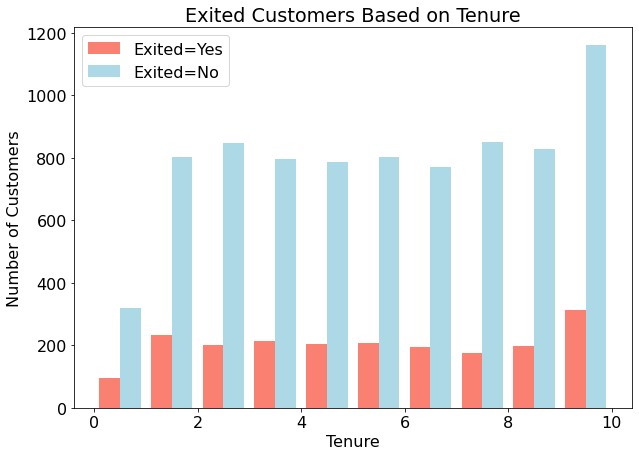

In [406]:
# Tenure 
tenure_exited_yes = df[df.Exited == 1].Tenure
tenure_exited_no = df[df.Exited == 0].Tenure

plot_exited_data(yes_df=tenure_exited_yes,
                 no_df=tenure_exited_no,
                 xlabel="Tenure",
                 ylabel="Number of Customers",
                 title="Exited Customers Based on Tenure",
                 labels=['Exited=Yes','Exited=No'],
                 colors=["Salmon", "Lightblue"])

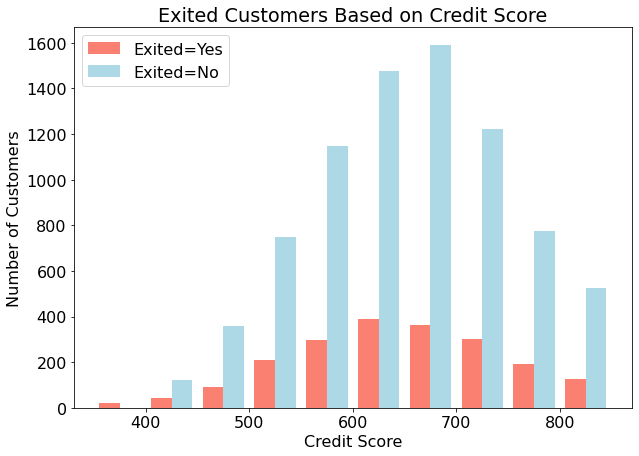

In [407]:
# Credit Score
cs_exited_yes = df[df.Exited == 1].CreditScore
cs_exited_no = df[df.Exited == 0].CreditScore

plot_exited_data(yes_df=cs_exited_yes,
                 no_df=cs_exited_no,
                 xlabel="Credit Score",
                 ylabel="Number of Customers",
                 title="Exited Customers Based on Credit Score",
                 labels=['Exited=Yes','Exited=No'],
                 colors=["Salmon", "Lightblue"],
                 legend_loc="upper left")

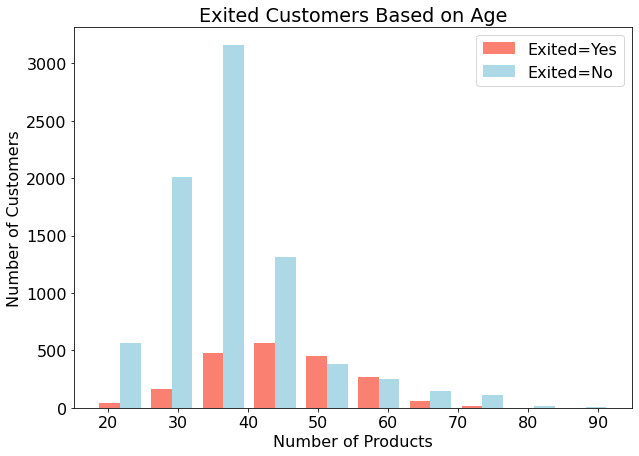

In [408]:
# Age
age_exited_yes = df[df.Exited == 1].Age
age_exited_no = df[df.Exited == 0].Age

plot_exited_data(yes_df=age_exited_yes,
                 no_df=age_exited_no,
                 xlabel="Number of Products",
                 ylabel="Number of Customers",
                 title="Exited Customers Based on Age",
                 labels=['Exited=Yes','Exited=No'],
                 colors=["Salmon", "Lightblue"])

In [321]:
def print_unique_obj_values(df):
  for col in df:
    if df[col].dtypes == "object":
      print(f'{col}: {df[col].unique()}') 

In [322]:
def print_unique_col_values(df):
  for col in df:
    print(f'{col}: {df[col].unique()}') 

In [323]:
print_unique_obj_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [324]:
df.sample(n=5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1315,607,Spain,Female,27,5,100912.19,1,0,0,7631.27,0
7622,794,France,Male,46,6,0.00,2,1,0,195325.74,0
1937,701,France,Male,30,3,156660.72,2,1,0,45742.42,0
5548,710,France,Male,38,2,0.00,2,1,0,96.27,0
6082,725,Germany,Male,40,8,104149.66,1,1,0,62027.90,0


In [325]:
# Encode gender feature
df["Gender"].replace({"Female": 0, "Male": 1}, 
                     inplace=True)

df.sample(n=5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5434,733,Spain,0,32,5,0.00,2,1,0,131625.14,0
9433,643,France,1,39,7,0.00,2,1,1,170392.59,0
6554,520,France,1,31,4,93249.40,1,1,0,77335.75,0
7947,639,Spain,0,35,5,136526.26,2,1,0,59653.03,0
4948,772,Spain,0,39,4,122486.11,2,1,1,140709.25,0


In [326]:
print_unique_col_values(df)

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [327]:
# One hot encoding geography column
df_copy = pd.get_dummies(data=df,
                         columns=["Geography"])

df_copy.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [328]:
df_copy.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [329]:
# Feature Scaling
cols_to_scale = ["CreditScore", "Balance", "EstimatedSalary"]

scaler = MinMaxScaler()
df_copy[cols_to_scale] = scaler.fit_transform(X=df_copy[cols_to_scale])

In [330]:
print_unique_col_values(df_copy)

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [331]:
# Split data into train and test split
X = df_copy.drop("Exited", axis=1)
y = df_copy["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape

((8000, 12), (2000, 12))

In [332]:
len(X_train.columns)

12

## Modeling ANN

In [333]:
# Build model
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit model
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 3s 3ms/step - loss: 0.4922 - accuracy: 0.7872
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4547 - accuracy: 0.7945
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7945
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4475 - accuracy: 0.7945
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.7945
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.7945
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.7945
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4412 - accuracy: 0.7945
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4400 - accuracy: 0.7955
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4395 - accura

In [334]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

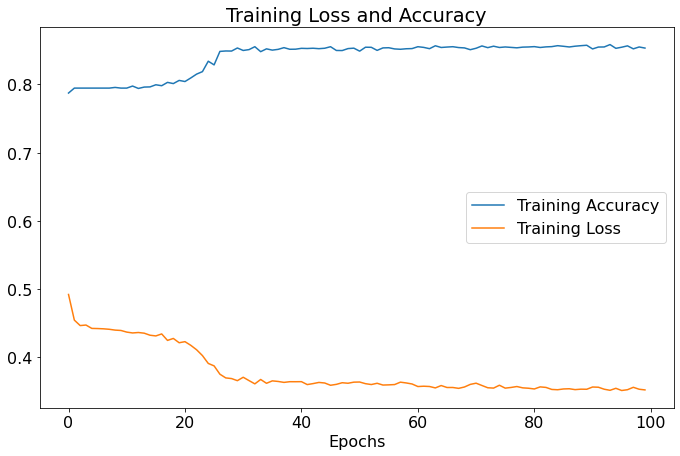

In [409]:
plt.figure(figsize=(25, 7))

plt.subplot(1, 2, 1)
plt.title("Training Loss and Accuracy")
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["loss"], label="Training Loss")

plt.xlabel("Epochs")
plt.legend();

In [343]:
# Parameters
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                156       
                                                                 
 dense_13 (Dense)            (None, 8)                 104       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


In [345]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 3ms/step - loss: 0.3436 - accuracy: 0.8585


[0.3435507118701935, 0.8585000038146973]

In [346]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 1ms/step


array([[0.04156401],
       [0.04169365],
       [0.15349185],
       [0.29936326],
       [0.03994295]], dtype=float32)

In [347]:
y_pred = []
for element in yp:
  if element > 0.5:
      y_pred.append(1)
  else:
      y_pred.append(0)

In [351]:
y_pred[:5]

[0, 0, 0, 0, 1]

In [353]:
y_test[:5]

6252    0
4684    0
1731    0
4742    0
4521    0
Name: Exited, dtype: int64

In [354]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.78      0.39      0.52       393

    accuracy                           0.86      2000
   macro avg       0.83      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



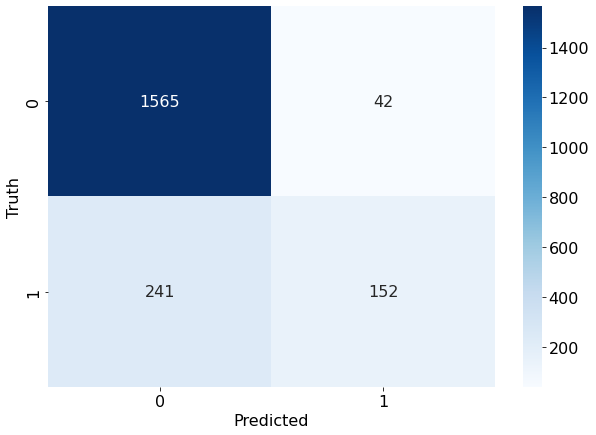

In [410]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, 
            annot=True, 
            cmap="Blues",
            fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth');

In [403]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

met_df = pd.DataFrame({
  "Metrics": ["Accuracy", "Recall", "Precision", "F1-score"],
  "Scores": [accuracy, recall, precision, f1]
})

met_df.T

,0,1,2,3
Metrics,Accuracy,Recall,Precision,F1-score
Scores,0.8585,0.386768,0.783505,0.517888


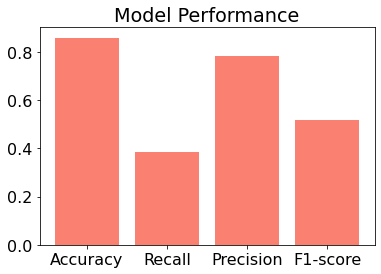

In [411]:
plt.bar(met_df["Metrics"],
        met_df["Scores"],
        color='salmon')

plt.title("Model Performance");